In [2]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

import pickle

In [3]:
# Read CSV files into Data Frames:
weather = pd.read_csv('working_weatherHistoryResampled_asof_2022.04.06.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
station = pd.read_csv('working_stationStateResampled_asof_2022.04.06.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [4]:
weather.shape

(684, 7)

In [5]:
station.shape

(75240, 6)

In [6]:
weather.head()

,weatherHour,latitude,longitude,description,temp,humidity,wind_speed
0,2022-02-22 12:00:00,53.35,-6.26,few clouds,282.81,71,10.80
1,2022-02-24 10:00:00,53.35,-6.26,scattered clouds,276.31,80,9.77
2,2022-03-01 09:00:00,53.35,-6.26,clear sky,277.21,86,0.98
3,2022-03-01 10:00:00,53.35,-6.26,scattered clouds,279.13,83,1.78
4,2022-03-01 11:00:00,53.35,-6.26,broken clouds,280.61,80,3.65


In [7]:
station.head()

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes
0,143661,1,2022-02-22 12:00:00,OPEN,12,18
1,143662,2,2022-02-22 12:00:00,OPEN,18,2
2,143663,3,2022-02-22 12:00:00,OPEN,20,13
3,143664,4,2022-02-22 12:00:00,OPEN,22,13
4,143665,5,2022-02-22 12:00:00,OPEN,38,2


In [8]:
stationWeather = pd.merge(station, weather, how="left", on=["weatherHour"])

In [9]:
stationWeather.head()

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed
0,143661,1,2022-02-22 12:00:00,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.8
1,143662,2,2022-02-22 12:00:00,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.8
2,143663,3,2022-02-22 12:00:00,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.8
3,143664,4,2022-02-22 12:00:00,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.8
4,143665,5,2022-02-22 12:00:00,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.8


In [10]:
stationWeather.tail()

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed
75235,218896,106,2022-04-04 10:00:00,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84
75236,218897,107,2022-04-04 10:00:00,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84
75237,218898,108,2022-04-04 10:00:00,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84
75238,218899,109,2022-04-04 10:00:00,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84
75239,218900,110,2022-04-04 10:00:00,OPEN,28,2,53.35,-6.26,broken clouds,285.57,86,10.84


In [11]:
stationWeather.dtypes

ID                         int64
stationId                  int64
weatherHour               object
status                    object
available_bike_stands      int64
available_bikes            int64
latitude                 float64
longitude                float64
description               object
temp                     float64
humidity                   int64
wind_speed               float64
dtype: object

In [12]:
stationWeather[['weatherDate', 'weatherHour']] = stationWeather['weatherHour'].str.split(' ', expand=True)
stationWeather

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed,weatherDate
0,143661,1,12:00:00,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22
1,143662,2,12:00:00,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22
2,143663,3,12:00:00,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22
3,143664,4,12:00:00,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22
4,143665,5,12:00:00,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75235,218896,106,10:00:00,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04
75236,218897,107,10:00:00,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04
75237,218898,108,10:00:00,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04
75238,218899,109,10:00:00,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04


In [13]:
stationWeather[['weatherHour', 'weatherMinute', 'weatherSecond']] = stationWeather['weatherHour'].str.split(':', expand=True)
stationWeather

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed,weatherDate,weatherMinute,weatherSecond
0,143661,1,12,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00
1,143662,2,12,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00
2,143663,3,12,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00
3,143664,4,12,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00
4,143665,5,12,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75235,218896,106,10,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00
75236,218897,107,10,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00
75237,218898,108,10,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00
75238,218899,109,10,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00


In [14]:
stationWeather[['weatherYear', 'weatherMonth', 'weatherDay']] = stationWeather['weatherDate'].str.split('-', expand=True)
stationWeather

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed,weatherDate,weatherMinute,weatherSecond,weatherYear,weatherMonth,weatherDay
0,143661,1,12,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22
1,143662,2,12,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22
2,143663,3,12,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22
3,143664,4,12,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22
4,143665,5,12,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75235,218896,106,10,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04
75236,218897,107,10,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04
75237,218898,108,10,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04
75238,218899,109,10,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04


In [15]:
stationWeather['cal_bike_stands'] = stationWeather.available_bike_stands + stationWeather.available_bikes
stationWeather

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed,weatherDate,weatherMinute,weatherSecond,weatherYear,weatherMonth,weatherDay,cal_bike_stands
0,143661,1,12,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22,30
1,143662,2,12,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22,20
2,143663,3,12,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22,33
3,143664,4,12,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22,35
4,143665,5,12,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,02,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75235,218896,106,10,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04,20
75236,218897,107,10,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04,40
75237,218898,108,10,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04,40
75238,218899,109,10,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,04,04,28


In [16]:
# Change description to category type for numeric encoding
stationWeather['description'] = stationWeather['description'].astype('category')
stationWeather['weatherYear'] = stationWeather['weatherYear'].astype('int64')
stationWeather['weatherMonth'] = stationWeather['weatherMonth'].astype('int64')
stationWeather['weatherDay'] = stationWeather['weatherDay'].astype('int64')
stationWeather.dtypes

ID                          int64
stationId                   int64
weatherHour                object
status                     object
available_bike_stands       int64
available_bikes             int64
latitude                  float64
longitude                 float64
description              category
temp                      float64
humidity                    int64
wind_speed                float64
weatherDate                object
weatherMinute              object
weatherSecond              object
weatherYear                 int64
weatherMonth                int64
weatherDay                  int64
cal_bike_stands             int64
dtype: object

In [17]:
# Catergorical Encoding
stationWeather['num_desc'] = stationWeather['description'].cat.codes
stationWeather

,ID,stationId,weatherHour,status,available_bike_stands,available_bikes,latitude,longitude,description,temp,humidity,wind_speed,weatherDate,weatherMinute,weatherSecond,weatherYear,weatherMonth,weatherDay,cal_bike_stands,num_desc
0,143661,1,12,OPEN,12,18,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,2,22,30,2
1,143662,2,12,OPEN,18,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,2,22,20,2
2,143663,3,12,OPEN,20,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,2,22,33,2
3,143664,4,12,OPEN,22,13,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,2,22,35,2
4,143665,5,12,OPEN,38,2,53.35,-6.26,few clouds,282.81,71,10.80,2022-02-22,00,00,2022,2,22,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75235,218896,106,10,OPEN,3,17,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,4,4,20,0
75236,218897,107,10,OPEN,29,11,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,4,4,40,0
75237,218898,108,10,OPEN,37,3,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,4,4,40,0
75238,218899,109,10,OPEN,4,24,53.35,-6.26,broken clouds,285.57,86,10.84,2022-04-04,00,00,2022,4,4,28,0


In [18]:
# Checking correlations for all the contious features
stationWeather.corr()

,ID,stationId,available_bike_stands,available_bikes,latitude,longitude,temp,humidity,wind_speed,weatherYear,weatherMonth,weatherDay,cal_bike_stands,num_desc
ID,1.000000,1.461928e-03,0.000109,-0.002508,NaN,NaN,2.304128e-01,-1.411975e-01,-2.389431e-01,NaN,5.216452e-01,5.341456e-01,-0.002657,8.602108e-03
stationId,0.001462,1.000000e+00,-0.012042,-0.042931,NaN,NaN,8.552269e-16,-6.187358e-16,-2.477227e-16,NaN,3.648792e-15,2.072456e-15,-0.064043,2.009989e-16
available_bike_stands,0.000109,-1.204187e-02,1.000000,-0.680484,NaN,NaN,1.946609e-02,-1.353588e-02,1.009944e-03,NaN,-1.736075e-03,1.703976e-03,0.574030,-1.162099e-03
available_bikes,-0.002508,-4.293149e-02,-0.680484,1.000000,NaN,NaN,-2.569532e-02,2.459045e-02,-4.632753e-03,NaN,4.845055e-03,-7.324583e-03,0.209393,-3.387794e-03
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,0.230413,8.552269e-16,0.019466,-0.025695,NaN,NaN,1.000000e+00,-4.675910e-01,1.368502e-01,NaN,-1.390100e-01,3.793883e-01,-0.002737,-3.380526e-02
humidity,-0.141197,-6.187358e-16,-0.013536,0.024590,NaN,NaN,-4.675910e-01,1.000000e+00,-1.789565e-01,NaN,-8.338770e-03,-1.352310e-01,0.009416,-4.910726e-02
wind_speed,-0.238943,-2.477227e-16,0.001010,-0.004633,NaN,NaN,1.368502e-01,-1.789565e-01,1.000000e+00,NaN,-7.770332e-03,-2.457230e-01,-0.003829,1.195065e-02
weatherYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Random Forest

In [19]:
X = stationWeather[['stationId', 'weatherHour', 'temp', 'humidity', 'wind_speed', 'cal_bike_stands', 'num_desc', 'weatherMonth', 'weatherDay']]
y = stationWeather.available_bikes

<h2>Training</h2>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Serialize model object into a file called model.pkl on disk using pickle
with open('dwmb_resample_allStation_randomForest_model_v2.pkl', 'wb') as handle:
    pickle.dump(random_forest, handle, pickle.HIGHEST_PROTOCOL)

<h2>Testing</h2>

In [22]:
randomForest_predictions = random_forest.predict(X_test)
print(type(randomForest_predictions))


<class 'numpy.ndarray'>


In [23]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':randomForest_predictions})
df

,Actual,Predicted
47568,0,2.60
62280,1,5.65
15008,9,13.77
34223,30,25.77
64509,25,21.19
...,...,...
32972,11,15.39
38023,30,30.68
61072,11,8.49
60529,17,21.42


In [24]:
# Metrics for the Model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, randomForest_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, randomForest_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, randomForest_predictions)))

Mean Absolute Error: 3.4440173666489455
Mean Squared Error: 21.132359560517454
Root Mean Squared Error: 4.59699462263308


In [25]:
# Calculate the absolute errors
errors = abs(randomForest_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print('MAPE:', mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.44 degrees.
MAPE: 47568           inf
62280    465.000000
15008     53.000000
34223     14.100000
64509     15.240000
            ...    
32972     39.909091
38023      2.266667
61072     22.818182
60529     26.000000
37864     10.000000
Name: available_bikes, Length: 22572, dtype: float64
Accuracy: -inf %.


In [26]:
# Function to output evaluation metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [27]:
printMetrics(y_test, randomForest_predictions)


MAE:  3.4440173666489455
RMSE:  4.59699462263308
R2:  0.7321290817941709


In [33]:
dfSort = df.sort_index()
dfSort

,Actual,Predicted
1,2,5.21
3,13,10.48
9,13,15.55
14,16,16.75
17,15,16.79
...,...,...
75220,31,18.64
75229,12,5.29
75233,1,10.21
75234,15,5.07


In [36]:
df100 = dfSort.head(50)
df100

,Actual,Predicted
1,2,5.21
3,13,10.48
9,13,15.55
14,16,16.75
17,15,16.79
18,3,11.34
24,14,14.29
28,14,25.53
29,12,16.79
34,17,9.01


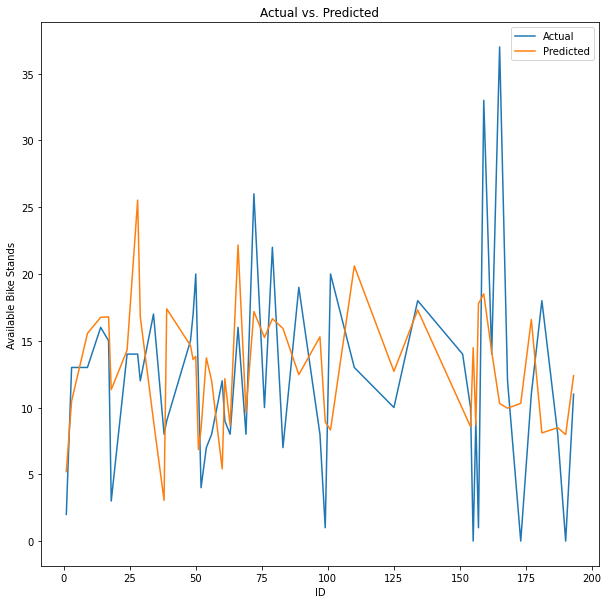

In [40]:
actual = df100['Actual']
predicted = df100['Predicted']
plt.figure(figsize=(10, 10))
plt.plot(actual, label = 'Actual')
plt.plot(predicted, label = 'Predicted')

plt.title("Actual vs. Predicted")
plt.xlabel('ID')
plt.ylabel('Available Bike Stands')
plt.legend()
plt.show()